In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install -U scikit-learn

In [2]:
# Importing the Credit Card Default Dataset
dataset = pd.read_csv('BankCreditCard.csv',index_col='Customer ID')
dataset = dataset.sample(n=3000,replace =False,random_state=1)
dataset.rename(columns=lambda x:x.lower(),inplace=True)

In [3]:
dataset

,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,repayment_status_may,...,april_bill_amount,may_bill_amount,june_bill_amount,previous_payment_jan,previous_payment_feb,previous_payment_march,previous_payment_april,previous_payment_may,previous_payment_june,default_payment
Customer ID,,,,,,,,,,,,,,,,,,,,,
10748,320000.0,1,3,1,32,0,0,0,0,0,...,94373.0,57778.0,14163.0,9396.0,6000.0,5000.0,3000.0,1000.0,2000.0,0
12574,20000.0,2,3,1,49,0,0,0,0,2,...,2690.0,1138.0,830.0,0.0,0.0,2929.0,0.0,183.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43887.0,0.0,46257.0,2200.0,1300.0,53987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40749.0,38816.0,40607.0,3700.0,2600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22449.0,15480.0,17343.0,0.0,4000.0,2000.0,0.0,3000.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,50000.0,2,2,1,23,0,0,0,0,0,...,-27250.0,20128.0,20502.0,3741.0,2079.0,2177.0,41508.0,713.0,837.0,0
20735,220000.0,1,1,1,49,0,0,0,0,0,...,227427.0,116637.0,115784.0,106000.0,5700.0,5700.0,4400.0,8531.0,0.0,0
17192,250000.0,2,2,1,31,2,0,0,0,0,...,209374.0,111278.0,125353.0,3973.0,5500.0,5005.0,3341.0,15500.0,4000.0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 10748 to 5263
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   credit_amount           3000 non-null   float64
 1   gender                  3000 non-null   int64  
 2   academic_qualification  3000 non-null   int64  
 3   marital                 3000 non-null   int64  
 4   age_years               3000 non-null   int64  
 5   repayment_status_jan    3000 non-null   int64  
 6   repayment_status_feb    3000 non-null   int64  
 7   repayment_status_march  3000 non-null   int64  
 8   repayment_status_april  3000 non-null   int64  
 9   repayment_status_may    3000 non-null   int64  
 10  repayment_status_june   3000 non-null   int64  
 11  jan_bill_amount         3000 non-null   float64
 12  feb_bill_amount         3000 non-null   float64
 13  march_bill_amount       3000 non-null   float64
 14  april_bill_amount       3000 non-nul

In [5]:
dataset.describe()

,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,repayment_status_may,...,april_bill_amount,may_bill_amount,june_bill_amount,previous_payment_jan,previous_payment_feb,previous_payment_march,previous_payment_april,previous_payment_may,previous_payment_june,default_payment
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.00000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,195886.666667,1.599000,1.856333,1.549333,35.345000,0.356333,0.311667,0.306000,0.253667,0.220333,...,56299.044000,40879.028000,39205.41600,5865.629667,7.753372e+03,6499.884000,5607.545000,5686.257000,6045.457000,0.225333
std,134296.285577,0.490183,0.790718,0.517354,9.104519,0.747582,0.795870,0.782667,0.745322,0.698056,...,85732.358744,61993.393264,60301.47667,16379.254728,5.260369e+04,23919.648219,18426.739262,18438.407477,22901.376406,0.417871
min,20000.000000,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-92334.000000,-15306.000000,-51443.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2765.750000,1854.250000,1206.00000,1000.000000,7.680000e+02,550.000000,348.750000,316.000000,166.750000,0.000000
50%,220000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25789.000000,18064.000000,17324.00000,3000.000000,2.500000e+03,1900.000000,1513.000000,1500.000000,1444.500000,0.000000
75%,270000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,52777.000000,50674.000000,48683.50000,6000.000000,5.000000e+03,5507.000000,4347.500000,5000.000000,4076.500000,0.000000
max,730000.000000,2.000000,6.000000,3.000000,73.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,629699.000000,488200.000000,513788.00000,406016.000000,2.674259e+06,597092.000000,335515.000000,379367.000000,528666.000000,1.000000


In [6]:
dataset.head(10)

,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,repayment_status_may,...,april_bill_amount,may_bill_amount,june_bill_amount,previous_payment_jan,previous_payment_feb,previous_payment_march,previous_payment_april,previous_payment_may,previous_payment_june,default_payment
Customer ID,,,,,,,,,,,,,,,,,,,,,
10748,320000.0,1,3,1,32,0,0,0,0,0,...,94373.0,57778.0,14163.0,9396.0,6000.0,5000.0,3000.0,1000.0,2000.0,0
12574,20000.0,2,3,1,49,0,0,0,0,2,...,2690.0,1138.0,830.0,0.0,0.0,2929.0,0.0,183.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43887.0,0.0,46257.0,2200.0,1300.0,53987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40749.0,38816.0,40607.0,3700.0,2600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22449.0,15480.0,17343.0,0.0,4000.0,2000.0,0.0,3000.0,2000.0,0
17459,240000.0,2,3,1,30,0,0,0,0,2,...,92227.0,65000.0,60848.0,4700.0,4505.0,12906.0,0.0,3310.0,2300.0,0
1477,200000.0,1,2,2,26,0,0,0,0,0,...,26027.0,12613.0,6600.0,13967.0,3774.0,5010.0,700.0,360.0,1713.0,0
5121,250000.0,1,2,2,37,0,0,0,0,0,...,64942.0,61803.0,58887.0,3600.0,2500.0,5790.0,3300.0,3000.0,2000.0,0
18339,20000.0,2,2,2,22,0,0,0,0,0,...,29706.0,18818.0,20006.0,3000.0,3002.0,5000.0,3000.0,1003.0,783.0,0


In [7]:
dataset.columns

Index(['credit_amount', 'gender', 'academic_qualification', 'marital',
       'age_years', 'repayment_status_jan', 'repayment_status_feb',
       'repayment_status_march', 'repayment_status_april',
       'repayment_status_may', 'repayment_status_june', 'jan_bill_amount',
       'feb_bill_amount', 'march_bill_amount', 'april_bill_amount',
       'may_bill_amount', 'june_bill_amount', 'previous_payment_jan',
       'previous_payment_feb', 'previous_payment_march',
       'previous_payment_april', 'previous_payment_may',
       'previous_payment_june', 'default_payment'],
      dtype='object')

In [8]:
dataset.isnull().sum()

credit_amount             0
gender                    0
academic_qualification    0
marital                   0
age_years                 0
repayment_status_jan      0
repayment_status_feb      0
repayment_status_march    0
repayment_status_april    0
repayment_status_may      0
repayment_status_june     0
jan_bill_amount           0
feb_bill_amount           0
march_bill_amount         0
april_bill_amount         0
may_bill_amount           0
june_bill_amount          0
previous_payment_jan      0
previous_payment_feb      0
previous_payment_march    0
previous_payment_april    0
previous_payment_may      0
previous_payment_june     0
default_payment           0
dtype: int64

# Data Visualisation and Analysis

In [9]:
correlation = dataset.corr()

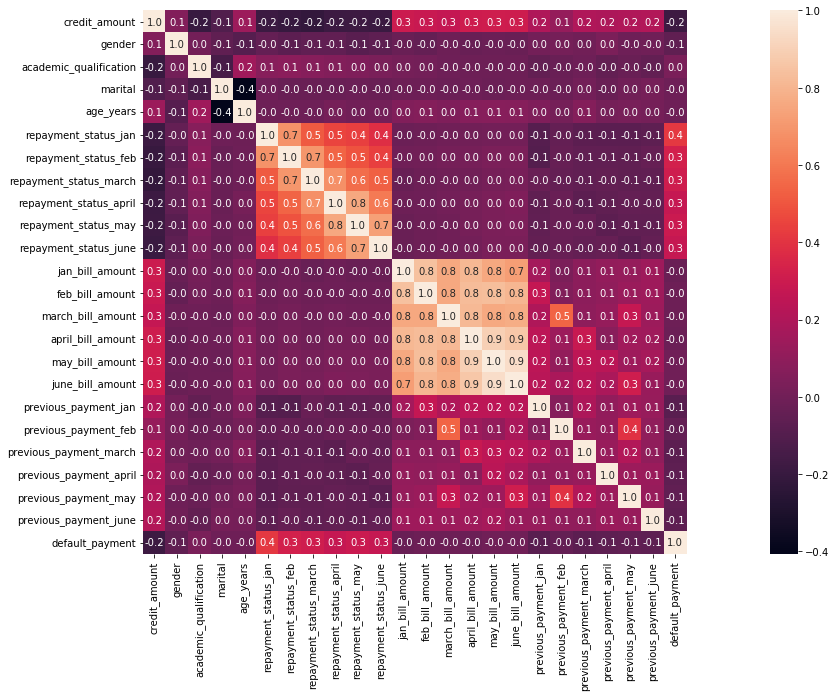

In [10]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

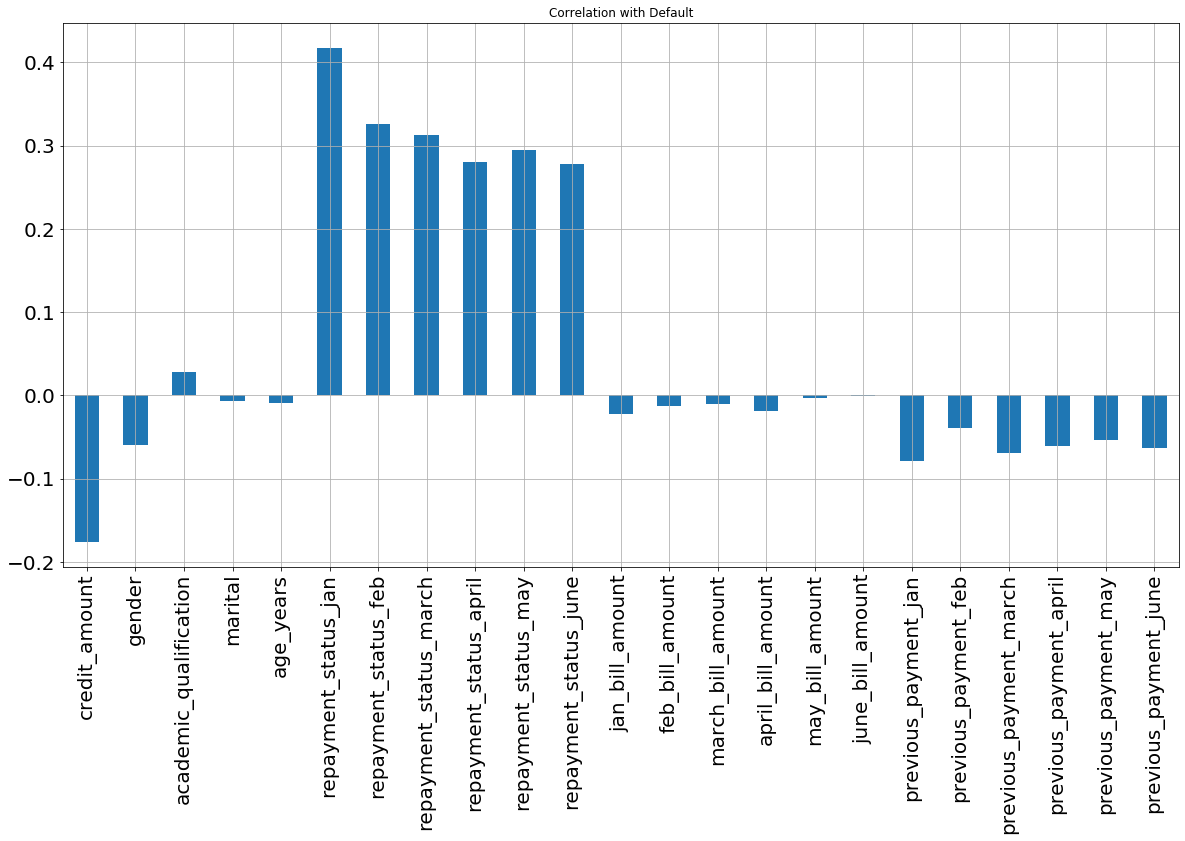

In [11]:
X = dataset.drop(['default_payment'],axis=1)
X.corrwith(dataset['default_payment']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)


In [12]:
dataset1=dataset.rename(columns={"repayment_status_jan": "Pay_1", "repayment_status_feb": "Pay_2","repayment_status_march":"Pay_3","repayment_status_april":"Pay_4","repayment_status_may":"Pay_5","repayment_status_june":"Pay_6"})

In [13]:
dataset1.columns

Index(['credit_amount', 'gender', 'academic_qualification', 'marital',
       'age_years', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6',
       'jan_bill_amount', 'feb_bill_amount', 'march_bill_amount',
       'april_bill_amount', 'may_bill_amount', 'june_bill_amount',
       'previous_payment_jan', 'previous_payment_feb',
       'previous_payment_march', 'previous_payment_april',
       'previous_payment_may', 'previous_payment_june', 'default_payment'],
      dtype='object')

In [14]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

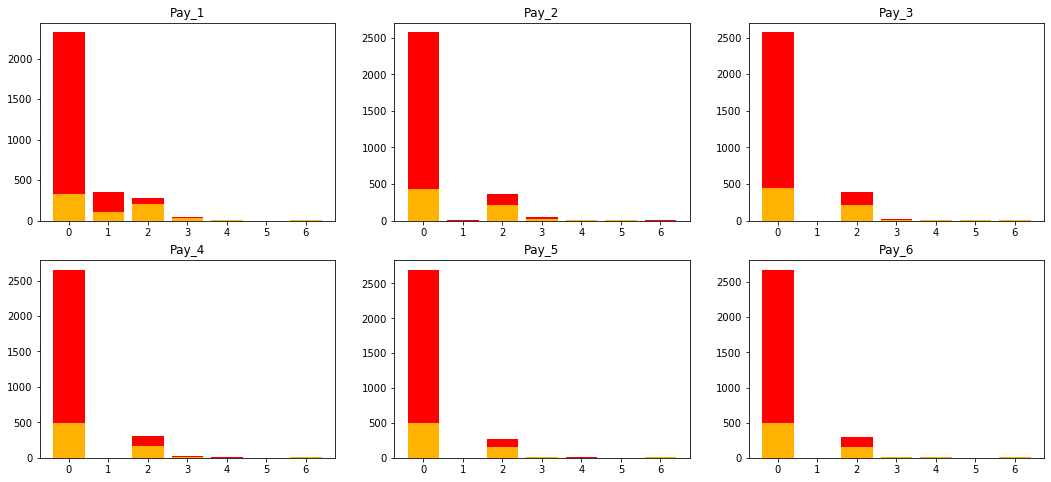

In [15]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('Pay_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = dataset1[pay_status_columns[i]].value_counts()
    x = dataset1[pay_status_columns[i]][(dataset1['default_payment']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

In [16]:
dataset2=dataset.rename(columns={"jan_bill_amount":"Pay_Amt1","feb_bill_amount":"Pay_Amt2","march_bill_amount":"Pay_Amt3", "april_bill_amount":"Pay_Amt4","may_bill_amount":"Pay_Amt5","june_bill_amount":"Pay_Amt6"})

In [17]:
dataset2

,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,repayment_status_may,...,Pay_Amt4,Pay_Amt5,Pay_Amt6,previous_payment_jan,previous_payment_feb,previous_payment_march,previous_payment_april,previous_payment_may,previous_payment_june,default_payment
Customer ID,,,,,,,,,,,,,,,,,,,,,
10748,320000.0,1,3,1,32,0,0,0,0,0,...,94373.0,57778.0,14163.0,9396.0,6000.0,5000.0,3000.0,1000.0,2000.0,0
12574,20000.0,2,3,1,49,0,0,0,0,2,...,2690.0,1138.0,830.0,0.0,0.0,2929.0,0.0,183.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43887.0,0.0,46257.0,2200.0,1300.0,53987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40749.0,38816.0,40607.0,3700.0,2600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22449.0,15480.0,17343.0,0.0,4000.0,2000.0,0.0,3000.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,50000.0,2,2,1,23,0,0,0,0,0,...,-27250.0,20128.0,20502.0,3741.0,2079.0,2177.0,41508.0,713.0,837.0,0
20735,220000.0,1,1,1,49,0,0,0,0,0,...,227427.0,116637.0,115784.0,106000.0,5700.0,5700.0,4400.0,8531.0,0.0,0
17192,250000.0,2,2,1,31,2,0,0,0,0,...,209374.0,111278.0,125353.0,3973.0,5500.0,5005.0,3341.0,15500.0,4000.0,0


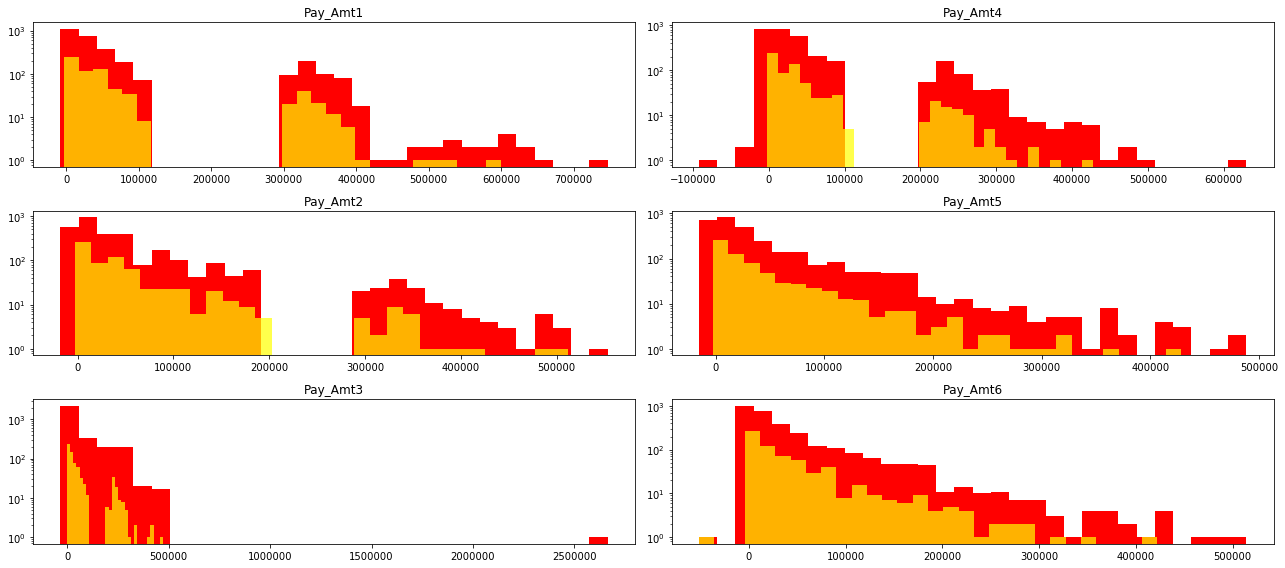

In [18]:
pay_amt_columns = getColumnsNames('Pay_Amt')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset2[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(dataset2[pay_amt_columns[i]][(dataset2['default_payment']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters

In [19]:
dataset3=dataset.rename(columns={"previous_payment_jan":"Bill_Amt1",'previous_payment_feb':"Bill_Amt2", 'previous_payment_march':"Bill_Amt3",'previous_payment_april':"Bill_Amt4", 'previous_payment_may':"Bill_Amt5",'previous_payment_june':"Bill_Amt6"})

In [20]:
dataset3

,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,repayment_status_may,...,april_bill_amount,may_bill_amount,june_bill_amount,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,default_payment
Customer ID,,,,,,,,,,,,,,,,,,,,,
10748,320000.0,1,3,1,32,0,0,0,0,0,...,94373.0,57778.0,14163.0,9396.0,6000.0,5000.0,3000.0,1000.0,2000.0,0
12574,20000.0,2,3,1,49,0,0,0,0,2,...,2690.0,1138.0,830.0,0.0,0.0,2929.0,0.0,183.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43887.0,0.0,46257.0,2200.0,1300.0,53987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40749.0,38816.0,40607.0,3700.0,2600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22449.0,15480.0,17343.0,0.0,4000.0,2000.0,0.0,3000.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,50000.0,2,2,1,23,0,0,0,0,0,...,-27250.0,20128.0,20502.0,3741.0,2079.0,2177.0,41508.0,713.0,837.0,0
20735,220000.0,1,1,1,49,0,0,0,0,0,...,227427.0,116637.0,115784.0,106000.0,5700.0,5700.0,4400.0,8531.0,0.0,0
17192,250000.0,2,2,1,31,2,0,0,0,0,...,209374.0,111278.0,125353.0,3973.0,5500.0,5005.0,3341.0,15500.0,4000.0,0


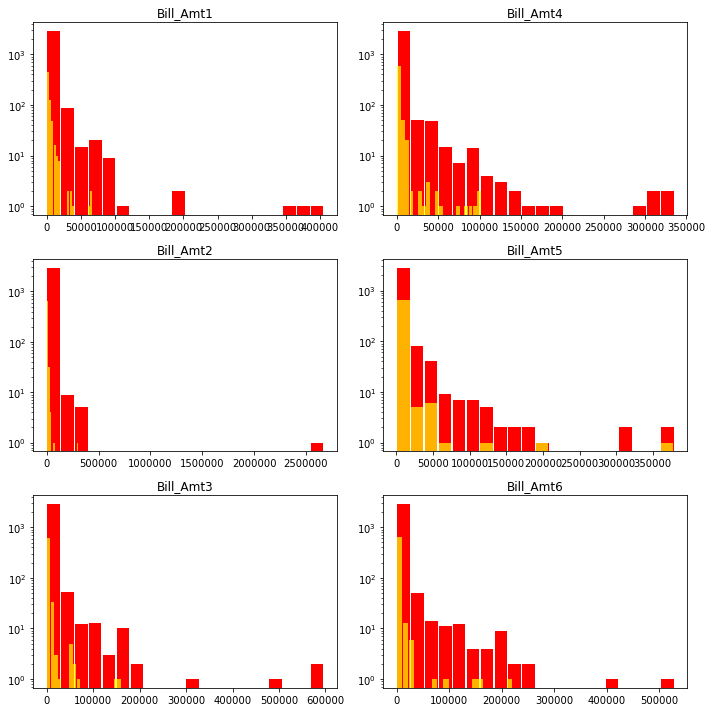

In [21]:
bill_atm_columns =  getColumnsNames('Bill_Amt')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset3[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(dataset3[bill_atm_columns[i]][(dataset3['default_payment']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

In [22]:
#categorical_vars = ['gender','academic_qualification','marital','repayment_status_jan','repayment_status_feb','repayment_status_march','repayment_status_april',
                   #'repayment_status_may','repayment_status_june']
#dataset[categorical_vars] = dataset[categorical_vars].astype(str)
#dataset = pd.get_dummies(dataset,columns=categorical_vars,drop_first=True)
#dataset.head()

In [23]:
dataset

,credit_amount,gender,academic_qualification,marital,age_years,repayment_status_jan,repayment_status_feb,repayment_status_march,repayment_status_april,repayment_status_may,...,april_bill_amount,may_bill_amount,june_bill_amount,previous_payment_jan,previous_payment_feb,previous_payment_march,previous_payment_april,previous_payment_may,previous_payment_june,default_payment
Customer ID,,,,,,,,,,,,,,,,,,,,,
10748,320000.0,1,3,1,32,0,0,0,0,0,...,94373.0,57778.0,14163.0,9396.0,6000.0,5000.0,3000.0,1000.0,2000.0,0
12574,20000.0,2,3,1,49,0,0,0,0,2,...,2690.0,1138.0,830.0,0.0,0.0,2929.0,0.0,183.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43887.0,0.0,46257.0,2200.0,1300.0,53987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40749.0,38816.0,40607.0,3700.0,2600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22449.0,15480.0,17343.0,0.0,4000.0,2000.0,0.0,3000.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,50000.0,2,2,1,23,0,0,0,0,0,...,-27250.0,20128.0,20502.0,3741.0,2079.0,2177.0,41508.0,713.0,837.0,0
20735,220000.0,1,1,1,49,0,0,0,0,0,...,227427.0,116637.0,115784.0,106000.0,5700.0,5700.0,4400.0,8531.0,0.0,0
17192,250000.0,2,2,1,31,2,0,0,0,0,...,209374.0,111278.0,125353.0,3973.0,5500.0,5005.0,3341.0,15500.0,4000.0,0


In [24]:
#one hot encoding
dataset['Undergraduate']=(dataset['academic_qualification']==1).astype('int')
dataset['Graduate']=(dataset['academic_qualification']==2).astype('int')
dataset['Postgraduate']=(dataset['academic_qualification']==3).astype('int')
dataset['Professional']=(dataset['academic_qualification']==4).astype('int')
dataset['Others']=(dataset['academic_qualification']==5).astype('int')
dataset.drop('academic_qualification',axis=1,inplace=True)
                                    


In [25]:
dataset['male']=(dataset['gender']==1).astype('int')
dataset.drop('gender',axis=1,inplace=True)

In [26]:
dataset['married']=(dataset['marital']==1).astype('int')
dataset['single']=(dataset['marital']==2).astype('int')
dataset.drop('marital',axis=1,inplace=True)

# for pay features if the <=0 then it means it was not delayed
Repayment_features=['repayment_status_jan','repayment_status_feb','repayment_status_march',
                    'repayment_status_april','repayment_status_may','repayment_status_june']
for p in Repayment_features:
    dataset.loc[dataset[p]<=0,p]=0

dataset.rename(columns={'default_payment':'Default'},inplace=True)

In [35]:

from sklearn.metrics import classification_report, accuracy_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,precision_recall_curve
from sklearn.preprocessing import RobustScaler


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 10748 to 5263
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   credit_amount           3000 non-null   float64
 1   age_years               3000 non-null   int64  
 2   repayment_status_jan    3000 non-null   int64  
 3   repayment_status_feb    3000 non-null   int64  
 4   repayment_status_march  3000 non-null   int64  
 5   repayment_status_april  3000 non-null   int64  
 6   repayment_status_may    3000 non-null   int64  
 7   repayment_status_june   3000 non-null   int64  
 8   jan_bill_amount         3000 non-null   float64
 9   feb_bill_amount         3000 non-null   float64
 10  march_bill_amount       3000 non-null   float64
 11  april_bill_amount       3000 non-null   float64
 12  may_bill_amount         3000 non-null   float64
 13  june_bill_amount        3000 non-null   float64
 14  previous_payment_jan    3000 non-nul

In [37]:
# Check whether the dataset is balanced or not
dataset.Default.value_counts()

0    2324
1     676
Name: Default, dtype: int64

In [38]:
target_name='Default'
X=dataset.drop('Default',axis=1)
robust_scaler= RobustScaler()
X=robust_scaler.fit_transform(X)
y=dataset[target_name]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10,stratify=y)


In [39]:
#Conclusion: Unbalanced Dataset
# Model Quality:
# 1. Generalization we will use Accuracy
# 2. For Quality we will use Precision and Recall based 
#    on Domain Question

In [40]:
# Seperate Features and Label
# Rules of Sklearn for classification
# 1. Data must be complete
# 2. Data must be strictly numeric
# 3. Data must be represented in the form of numpy array 
#    where,
#     features must be a 2d array
#     labels must be 1d array
# 4. Labels can either be numeric, boolean or string.

#features = dataset3.iloc[:,:-1].values
#label = dataset3.iloc[:,-1].values
#X = dataset3.iloc[:,:-1].values
#y = dataset3.iloc[:,-1].values



In [41]:
# Seperate our data as training and testing data where,
# 1. Training data is used to train the model
# 2. Testing data is used to judge the quality of the model

#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(features, label,test_size=0.3,random_state=10)


In [42]:
X_train.shape

(2400, 28)

In [43]:
X_test.shape

(600, 28)

In [44]:
#Dataframe for evaluation meterics
metrics=pd.DataFrame(index=['accuracy','precision','recall'],
                     columns=['LogisticReg','ClassTree','RandomFor','SVC'])

In [45]:
# logistic Regression

# Import the estimator object 

from sklearn.linear_model import LogisticRegression

# Create an instance of the estimator
logistic_regression= LogisticRegression(random_state=15)

# Use the training data to train the estimator
logistic_regression.fit(X_train,y_train)

# Evaluate the model
y_pred_test= logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg']=accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','LogisticReg']=precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','LogisticReg']=recall_score(y_pred=y_pred_test,y_true=y_test)



In [46]:
# Evaluate the model
#y_pred_test= logistic_regression.predict(X_test)

In [47]:
# Confusion Matrix
CM=confusion_matrix(y_pred=y_pred_test, y_true=y_test)

In [48]:
CM

array([[446,  19],
       [ 86,  49]], dtype=int64)

In [49]:
print(classification_report(y_pred=y_pred_test, y_true=y_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       465
           1       0.72      0.36      0.48       135

    accuracy                           0.82       600
   macro avg       0.78      0.66      0.69       600
weighted avg       0.81      0.82      0.80       600



# Decision Tree

In [41]:
# import the estimator object(model)
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the estimator
class_tree= DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state=20)
 
    
 # use the tarining data to train the estimator
class_tree.fit(X_train,y_train)

#Evaluate the model
y_pred_test= class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree']=accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','ClassTree']=precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','ClassTree']=recall_score(y_pred=y_pred_test,y_true=y_test)



In [42]:
# confusion matrix
CM= confusion_matrix(y_pred=y_pred_test,y_true=y_test)

In [43]:
CM

array([[420,  45],
       [ 92,  43]], dtype=int64)

In [44]:
print(classification_report(y_pred=y_pred_test, y_true=y_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       465
           1       0.49      0.32      0.39       135

    accuracy                           0.77       600
   macro avg       0.65      0.61      0.62       600
weighted avg       0.75      0.77      0.75       600



# Random Forest Classification

In [45]:
# import the estimator object(model)
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the estimator
class_rand= RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 20)
    
 # use the tarining data to train the estimator
class_rand.fit(X_train,y_train)

#Evaluate the model
y_pred_test= class_tree.predict(X_test)
metrics.loc['accuracy','RandomFor']=accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','RandomFor']=precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','RandomFor']=recall_score(y_pred=y_pred_test,y_true=y_test)



In [46]:
# confusion matrix
CM= confusion_matrix(y_pred=y_pred_test,y_true=y_test)

In [47]:
CM

array([[420,  45],
       [ 92,  43]], dtype=int64)

In [48]:
print(classification_report(y_pred=y_pred_test, y_true=y_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       465
           1       0.49      0.32      0.39       135

    accuracy                           0.77       600
   macro avg       0.65      0.61      0.62       600
weighted avg       0.75      0.77      0.75       600



# Support Vector Machine

In [49]:
# import the estimator object(model)
from sklearn.svm import SVC

# Create an instance of the estimator
class_svc= SVC(kernel= 'linear',gamma=0.9)

 # use the tarining data to train the estimator
class_svc.fit(X_train,y_train)

#Evaluate the model
y_pred_test= class_svc.predict(X_test)
metrics.loc['accuracy','SVC']=accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','SVC']=precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','SVC']=recall_score(y_pred=y_pred_test,y_true=y_test)



In [50]:
print(class_svc.score(X_train,y_train))
print(class_svc.score(X_test,y_test))

0.825
0.8216666666666667


In [51]:
# confusion matrix
CM= confusion_matrix(y_pred=y_pred_test,y_true=y_test)

In [52]:
CM

array([[441,  24],
       [ 83,  52]], dtype=int64)

In [53]:
print(classification_report(y_pred=y_pred_test, y_true=y_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       465
           1       0.68      0.39      0.49       135

    accuracy                           0.82       600
   macro avg       0.76      0.67      0.69       600
weighted avg       0.81      0.82      0.80       600

